# Case study on Unsupervised Learning
Do the following in the wine dataset.
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.


# 1. Read the dataset to the python environment.


In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [198]:
df=pd.read_csv('Wine.csv')

# Exploratory Data Analysis(EDA)

In [199]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [201]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

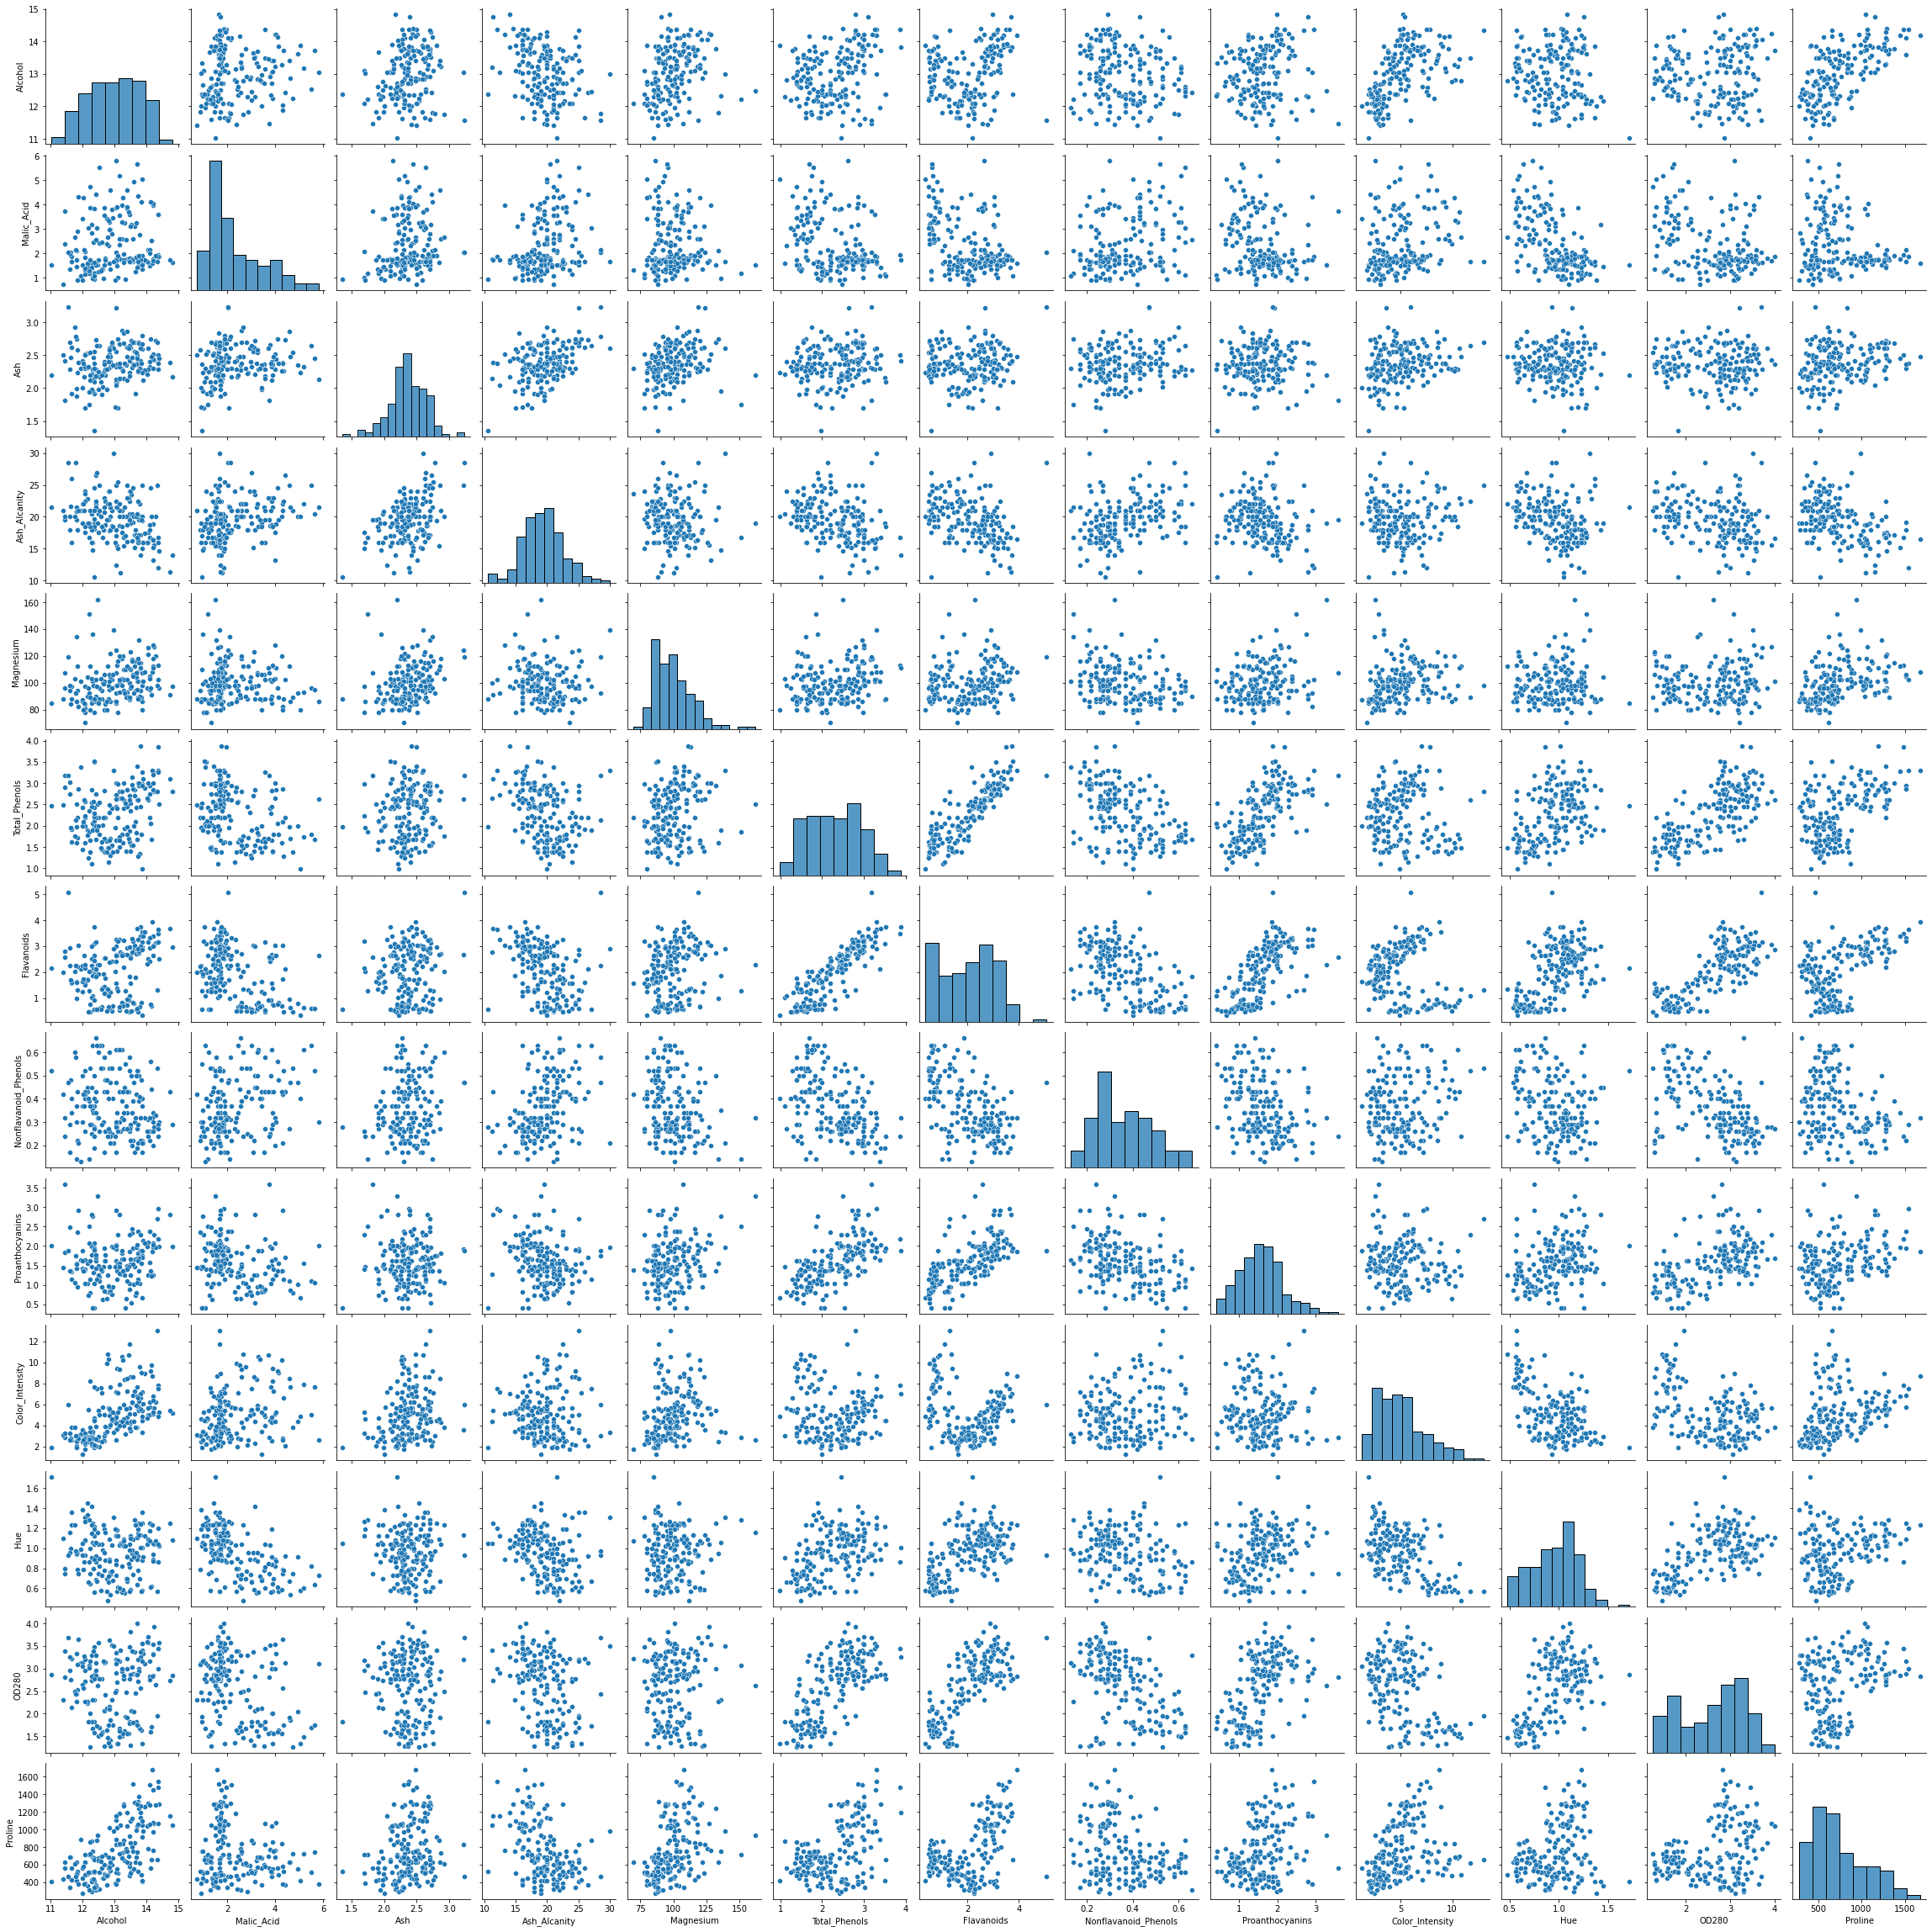

In [202]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:>

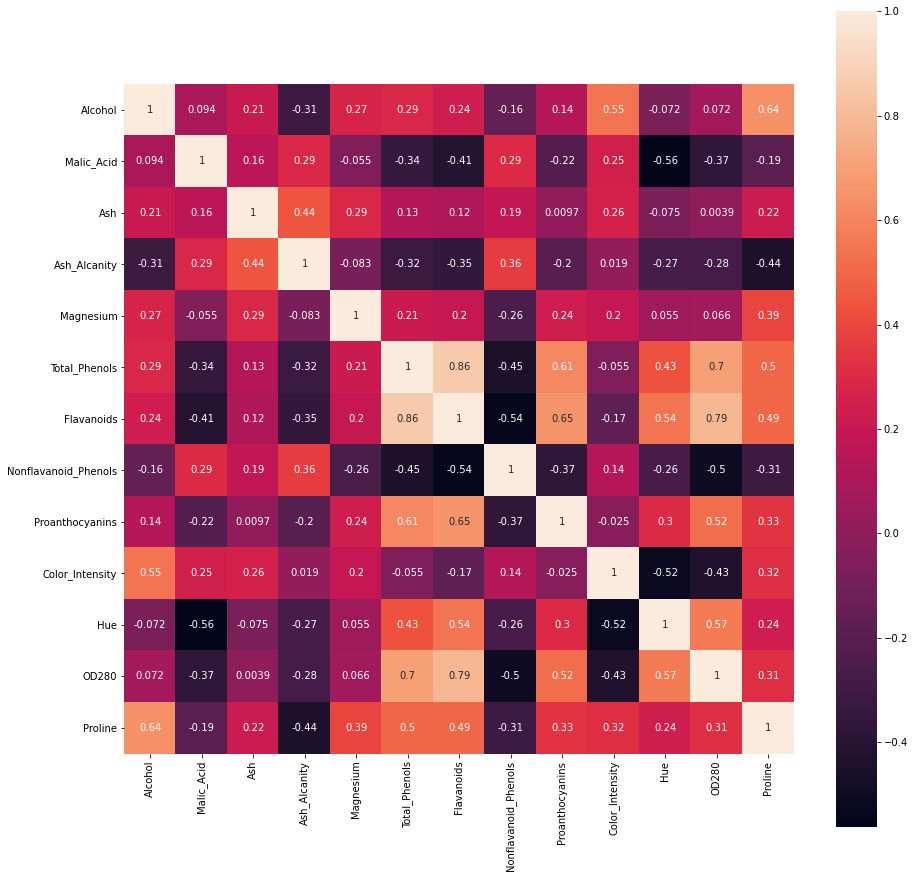

In [203]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,square=True)

# Scaling the data

In [204]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(df)
x=pd.DataFrame(x)

# Handling Outliers

In [205]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x2cfa2631b80>,
 'caps': [<matplotlib.lines.Line2D at 0x2cfa263f280>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cfa2631820>,
 'medians': [<matplotlib.lines.Line2D at 0x2cfa263f940>,
 'fliers': [<matplotlib.lines.Line2D at 0x2cfa263fca0>,
 'means': []}

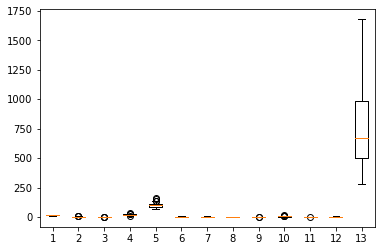

In [206]:
plt.boxplot(df[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280','Proline']])

{'whiskers': [<matplotlib.lines.Line2D at 0x2cfa219b7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cfa219be80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cfa219b460>],
 'medians': [<matplotlib.lines.Line2D at 0x2cfa21a9580>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cfa21a98e0>],
 'means': []}

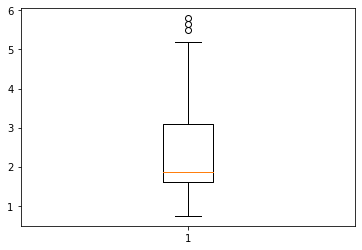

In [207]:
plt.boxplot(df[['Malic_Acid']])

In [208]:
Q1=np.percentile(df['Malic_Acid'],25,interpolation='midpoint')
Q2=np.percentile(df['Malic_Acid'],50,interpolation='midpoint')
Q3=np.percentile(df['Malic_Acid'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

1.605
1.8650000000000002
3.065
-0.585
5.255


In [209]:
outlier=[]
for x in df['Malic_Acid']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[5.8, 5.51, 5.65]

In [210]:
ind1=df['Malic_Acid']>up_lim
df.loc[ind1].index

Int64Index([123, 137, 173], dtype='int64')

In [211]:
df.drop([123, 137, 173],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cfa21fb580>,
 'caps': [<matplotlib.lines.Line2D at 0x2cfa21fbc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cfa21fb220>],
 'medians': [<matplotlib.lines.Line2D at 0x2cfa2205340>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cfa22056a0>],
 'means': []}

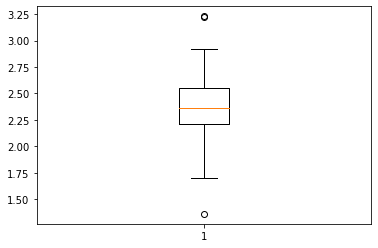

In [212]:
plt.boxplot(df[[ 'Ash']])

In [213]:
Q1=np.percentile(df['Ash'],25,interpolation='midpoint')
Q2=np.percentile(df['Ash'],50,interpolation='midpoint')
Q3=np.percentile(df['Ash'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.21
2.36
2.5549999999999997
1.6925000000000003
3.0724999999999993


In [214]:
outlier=[]
for x in df['Ash']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[3.22, 1.36, 3.23]

In [215]:
ind1=df['Ash']>up_lim
df.loc[ind1].index

Int64Index([25, 121], dtype='int64')

In [216]:
ind=df['Ash']<low_lim
df.loc[ind].index

Int64Index([59], dtype='int64')

In [217]:
df.drop([25,121,59],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cfa225acd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cfa22673d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cfa225a970>],
 'medians': [<matplotlib.lines.Line2D at 0x2cfa2267a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cfa2267df0>],
 'means': []}

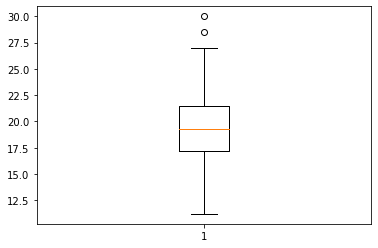

In [218]:
plt.boxplot(df[[ 'Ash_Alcanity']])

In [219]:
Q1=np.percentile(df['Ash_Alcanity'],25,interpolation='midpoint')
Q2=np.percentile(df['Ash_Alcanity'],50,interpolation='midpoint')
Q3=np.percentile(df['Ash_Alcanity'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

17.15
19.25
21.5
10.624999999999996
28.025000000000002


In [220]:
ind1=df['Ash_Alcanity']>up_lim
df.loc[ind1].index

Int64Index([73, 127], dtype='int64')

In [221]:
df.drop([73, 127],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cfa22c40a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cfa22c4760>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cfa22b4d00>],
 'medians': [<matplotlib.lines.Line2D at 0x2cfa22c4e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cfa22cf1c0>],
 'means': []}

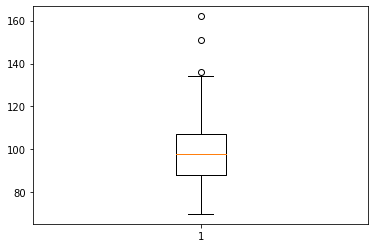

In [222]:
plt.boxplot(df[[ 'Magnesium']])

In [223]:
Q1=np.percentile(df['Magnesium'],25,interpolation='midpoint')
Q2=np.percentile(df['Magnesium'],50,interpolation='midpoint')
Q3=np.percentile(df['Magnesium'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

88.0
98.0
107.0
59.5
135.5


In [224]:
ind1=df['Magnesium']>up_lim
df.loc[ind1].index

Int64Index([69, 78, 95], dtype='int64')

In [225]:
df.drop([69, 78, 95],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cfa231d040>,
 'caps': [<matplotlib.lines.Line2D at 0x2cfa231d700>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cfa230fca0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cfa231ddc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cfa232b160>],
 'means': []}

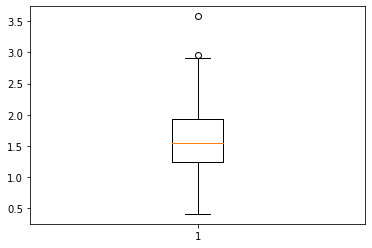

In [226]:
plt.boxplot(df[['Proanthocyanins']])

In [227]:
Q1=np.percentile(df['Proanthocyanins'],25,interpolation='midpoint')
Q2=np.percentile(df['Proanthocyanins'],50,interpolation='midpoint')
Q3=np.percentile(df['Proanthocyanins'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

1.25
1.54
1.9249999999999998
0.23750000000000027
2.9374999999999996


In [228]:
ind1=df['Proanthocyanins']>up_lim
df.loc[ind1].index

Int64Index([14, 110], dtype='int64')

In [229]:
df.drop([14, 110],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cfa2375940>,
 'caps': [<matplotlib.lines.Line2D at 0x2cfa2382040>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cfa2375640>],
 'medians': [<matplotlib.lines.Line2D at 0x2cfa2382700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cfa2382a60>],
 'means': []}

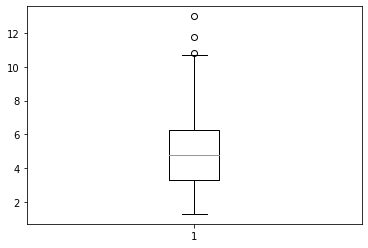

In [230]:
plt.boxplot(df[['Color_Intensity']])

In [231]:
Q1=np.percentile(df['Color_Intensity'],25,interpolation='midpoint')
Q2=np.percentile(df['Color_Intensity'],50,interpolation='midpoint')
Q3=np.percentile(df['Color_Intensity'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

3.27
4.8
6.25
-1.1999999999999997
10.719999999999999


In [232]:
ind1=df['Color_Intensity']>up_lim
df.loc[ind1].index

Int64Index([151, 158, 159], dtype='int64')

In [233]:
df.drop([151, 158, 159],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cfa23cfd90>,
 'caps': [<matplotlib.lines.Line2D at 0x2cfa23df490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cfa23cfa30>],
 'medians': [<matplotlib.lines.Line2D at 0x2cfa23dfb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cfa23dfeb0>],
 'means': []}

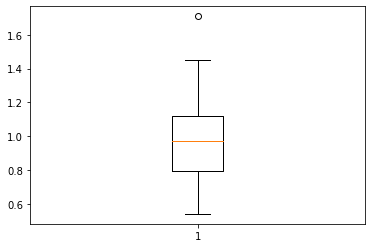

In [234]:
plt.boxplot(df[['Hue']])

In [235]:
Q1=np.percentile(df['Hue'],25,interpolation='midpoint')
Q2=np.percentile(df['Hue'],50,interpolation='midpoint')
Q3=np.percentile(df['Hue'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

0.795
0.97
1.12
0.30749999999999994
1.6075000000000002


In [236]:
ind1=df['Hue']>up_lim
df.loc[ind1].index

Int64Index([115], dtype='int64')

In [237]:
df.drop([115],inplace=True)

# Insight
All outliers are removed.

# 2. Try out different clustering models in the wine dataset.


# Hierarchial Clustering

In [238]:
from sklearn.cluster import AgglomerativeClustering
cluster= AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
labels_hc=cluster.fit_predict(df)
labels_hc

array([2, 2, 2, 0, 3, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 4, 3, 3, 2,
       2, 4, 2, 0, 4, 2, 0, 0, 2, 0, 2, 4, 4, 2, 2, 3, 3, 2, 2, 3, 4, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       4, 1, 1, 4, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1,
       1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 4,
       4, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 4, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       1, 1, 3, 3, 4, 4, 3], dtype=int64)

<AxesSubplot:xlabel='Alcohol', ylabel='Proline'>

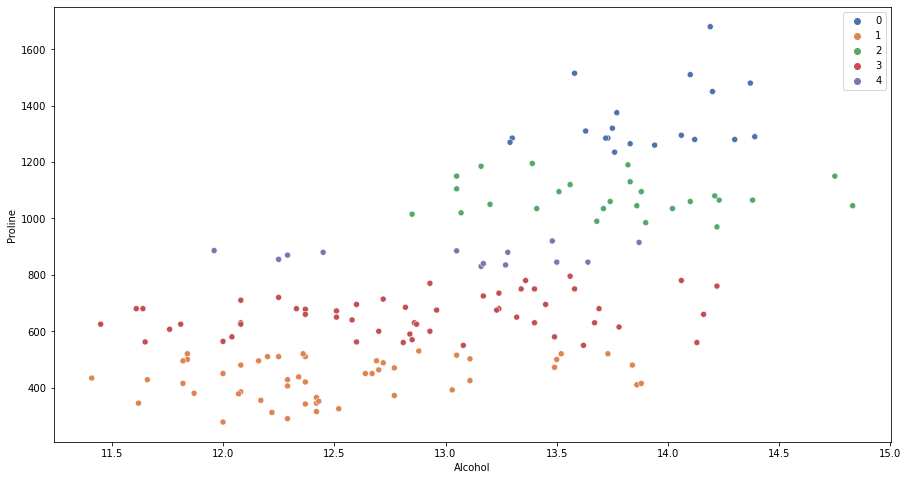

In [239]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Alcohol',y='Proline',data=df,hue=labels_hc,palette="deep")

# KMeans

In [240]:
#kmeans
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=5)
model_kmeans.fit(df)
labels_kmean=model_kmeans.predict(df)
labels_kmean

array([1, 1, 1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 3, 3, 3, 1,
       1, 3, 1, 2, 3, 1, 2, 2, 1, 2, 1, 3, 3, 1, 1, 3, 3, 1, 1, 4, 3, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 4, 0, 4, 0, 0, 4, 0, 0, 3,
       3, 0, 0, 3, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0,
       0, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0,
       4, 4, 0, 0, 0, 0, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 3, 0, 4, 3,
       3, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 3, 0, 4, 4, 4, 4, 0, 4, 4, 3, 4,
       0, 0, 4, 3, 3, 3, 4])

<AxesSubplot:xlabel='Alcohol', ylabel='Proline'>

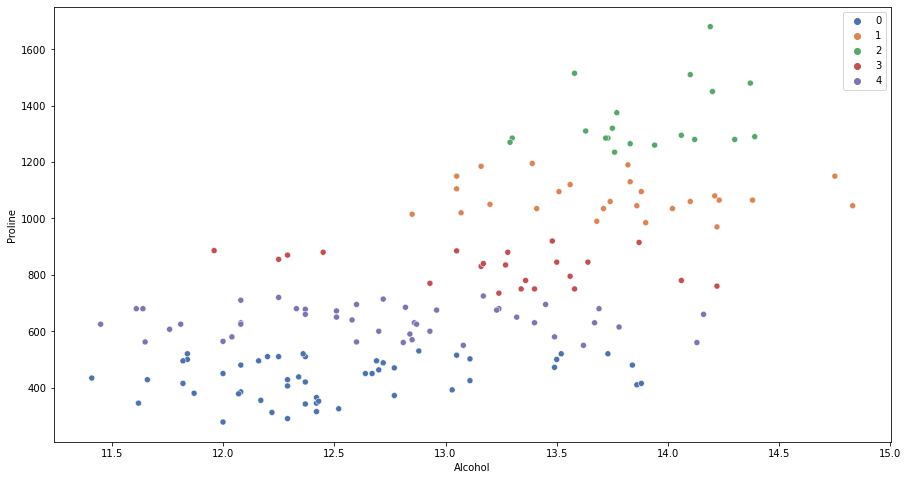

In [241]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Alcohol',y='Proline',data=df,hue=labels_kmean,palette="deep")

# 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.


# Hierarchial Clustering

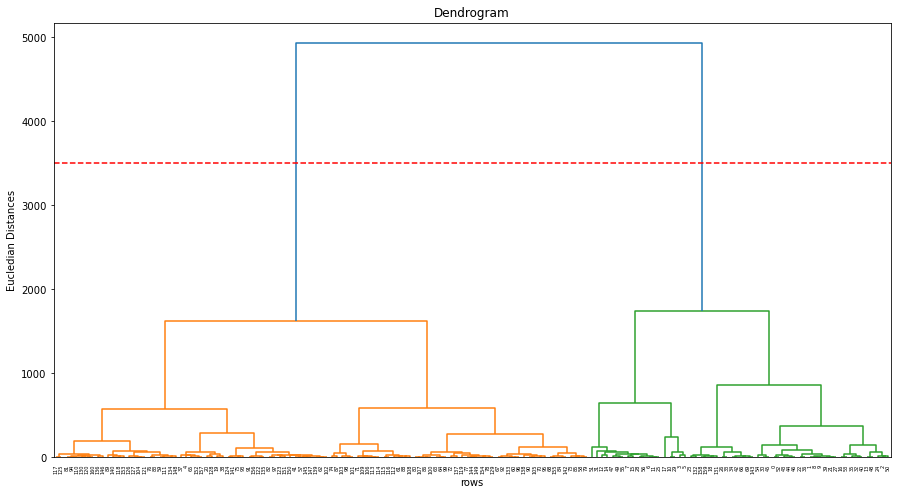

In [242]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(df,method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('rows')
plt.hlines(3500,0,5000,colors='red',linestyles='dashed')
plt.ylabel('Eucledian Distances')
plt.show()

In [243]:
from sklearn.cluster import AgglomerativeClustering
cluster= AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels_hc=cluster.fit_predict(df)
labels_hc

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1], dtype=int64)

<AxesSubplot:xlabel='Alcohol', ylabel='Proline'>

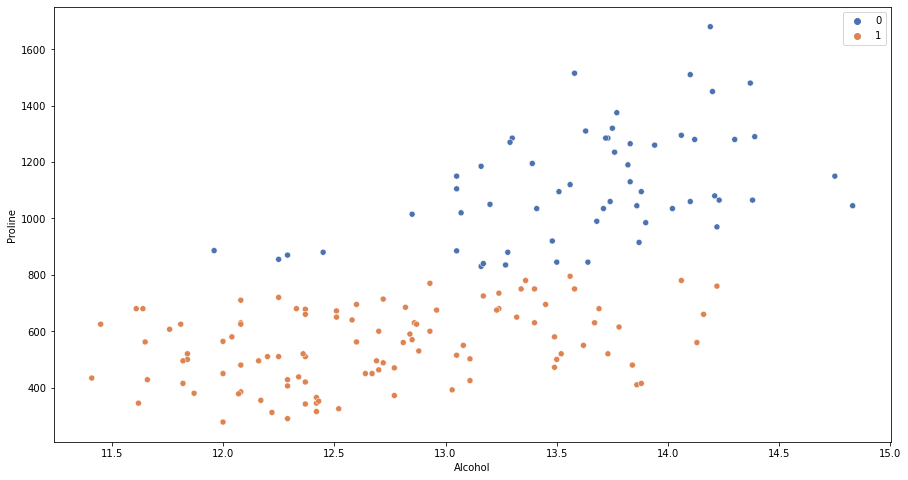

In [244]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Alcohol',y='Proline',data=df,hue=labels_hc,palette="deep")

# Kmeans

In [245]:
#kmeans
from sklearn.cluster import KMeans
ks=range(1,10)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(df)
    inertia.append(model.inertia_)

C:\Users\NJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


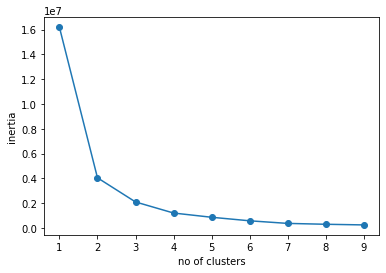

In [246]:
plt.plot(ks,inertia,'-o')
plt.xlabel('no of clusters')
plt.ylabel('inertia')
plt.show()

In [247]:
#kmeans
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(df)
labels_kmean=model_kmeans.predict(df)
labels_kmean

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 2])

<AxesSubplot:xlabel='Alcohol', ylabel='Proline'>

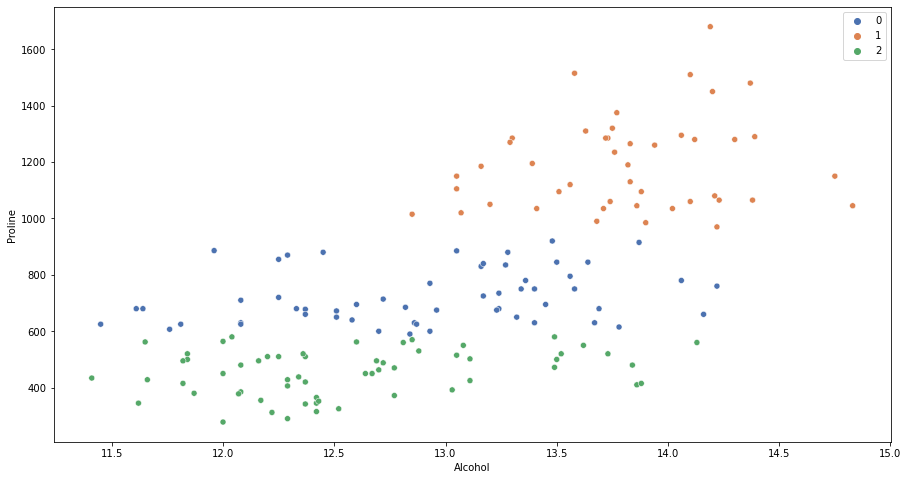

In [248]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Alcohol',y='Proline',data=df,hue=labels_kmean,palette="deep")

# Principal Component Analysis(PCA)

In [249]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
PCA_df=pd.DataFrame(pca.fit_transform(df),columns=['P1','P2'])
PCA_df

,P1,P2
0,311.649670,22.867839
1,296.191046,-3.939950
2,431.157383,-5.168271
3,726.334346,1.700587
4,-18.482769,19.708243
...,...,...
156,-93.930733,-5.696551
157,-3.773925,3.651279
158,81.547186,20.220576
159,86.545152,20.072837


In [250]:
PCA_df['cluster_km']=labels_kmean
PCA_df['cluster_hc']=labels_hc
PCA_df

,P1,P2,cluster_km,cluster_hc
0,311.649670,22.867839,1,0
1,296.191046,-3.939950,1,0
2,431.157383,-5.168271,1,0
3,726.334346,1.700587,1,0
4,-18.482769,19.708243,0,1
...,...,...,...,...
156,-93.930733,-5.696551,0,1
157,-3.773925,3.651279,0,1
158,81.547186,20.220576,0,0
159,86.545152,20.072837,0,0


In [257]:
red_centers_km=pca.transform(model_kmeans.cluster_centers_)
red_centers_km

array([[ -30.69970877,    3.21452604],
       [ 438.23190946,   -1.46749642],
       [-300.02087058,   -1.89960199]])

# Kmeans PCA plot P1 vs P2

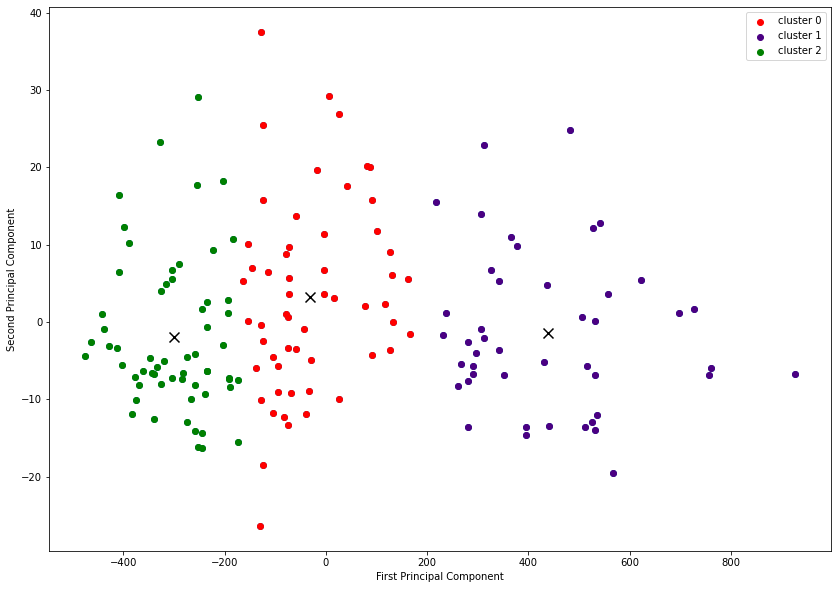

In [258]:
plt.figure(figsize=(14,10))
plt.scatter(PCA_df['P1'],PCA_df['P2'])
plt.scatter(PCA_df[PCA_df['cluster_km']==0].loc[:,'P1'],PCA_df[PCA_df['cluster_km']==0].loc[:,'P2'],color='red',label='cluster 0')
plt.scatter(PCA_df[PCA_df['cluster_km']==1].loc[:,'P1'],PCA_df[PCA_df['cluster_km']==1].loc[:,'P2'],color='indigo',label='cluster 1')
plt.scatter(PCA_df[PCA_df['cluster_km']==2].loc[:,'P1'],PCA_df[PCA_df['cluster_km']==2].loc[:,'P2'],color='green',label='cluster 2')

plt.scatter(red_centers_km[:,0],red_centers_km[:,1],color='black',marker='x',s=100)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

# Hierarchial Clustering plot P1 vs P2

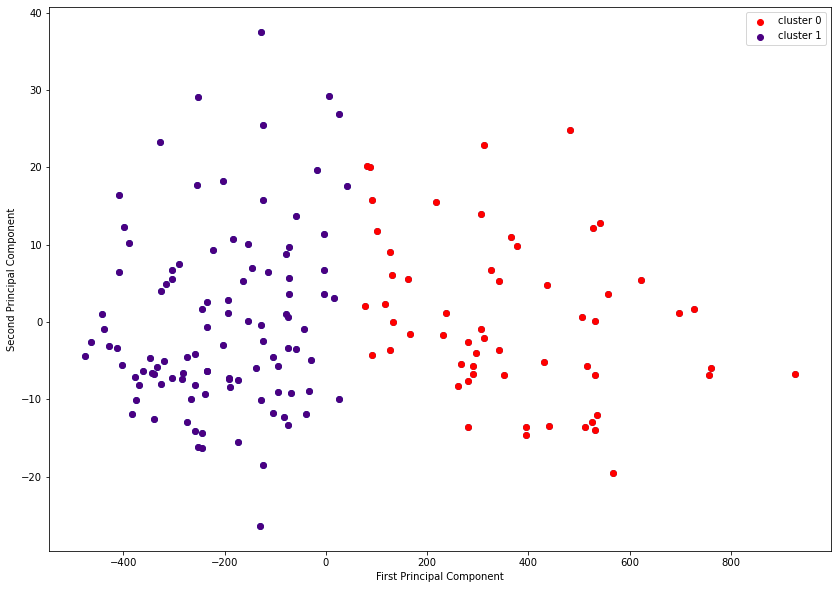

In [260]:
plt.figure(figsize=(14,10))
plt.scatter(PCA_df['P1'],PCA_df['P2'])
plt.scatter(PCA_df[PCA_df['cluster_hc']==0].loc[:,'P1'],PCA_df[PCA_df['cluster_hc']==0].loc[:,'P2'],color='red',label='cluster 0')
plt.scatter(PCA_df[PCA_df['cluster_hc']==1].loc[:,'P1'],PCA_df[PCA_df['cluster_hc']==1].loc[:,'P2'],color='indigo',label='cluster 1')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

# Insight 
## With PCA and plots it is clear that the models are clustered  into 3 and 2 clusters in kmeans and Hierarchial Clustering respectively.
## Hence there are 3 category of wines with Kmeans model and 2 category of wines with Hierarchial Clustering model.